In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Resources/sales.csv')
df.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
#drop unneed columns
df_clean = df.drop(columns=['Order ID', 'Row ID','Customer ID', 'Segment', 'City',  'Product ID', 'Product Name'], axis=1)
df_clean.head()

,Order Date,State,Region,Category,Sub-Category,Sales
0,08/11/2017,Kentucky,South,Furniture,Bookcases,261.9600
1,08/11/2017,Kentucky,South,Furniture,Chairs,731.9400
2,12/06/2017,California,West,Office Supplies,Labels,14.6200
3,11/10/2016,Florida,South,Furniture,Tables,957.5775
4,11/10/2016,Florida,South,Office Supplies,Storage,22.3680


In [5]:
#change to datetime
df_clean['Order Date']= pd.to_datetime(df['Order Date'])

In [6]:
#sort by dates
df_clean.sort_values(by =[ 'Region', 'Order Date'])

,Order Date,State,Region,Category,Sub-Category,Sales
540,2015-01-02,Wisconsin,Central,Technology,Accessories,468.900
6547,2015-01-03,Illinois,Central,Furniture,Chairs,634.116
6548,2015-01-03,Illinois,Central,Office Supplies,Paper,17.472
7947,2015-01-03,Texas,Central,Office Supplies,Fasteners,18.840
7948,2015-01-03,Texas,Central,Furniture,Chairs,362.250
...,...,...,...,...,...,...
5456,2018-12-29,Washington,West,Office Supplies,Fasteners,19.600
5457,2018-12-29,Washington,West,Furniture,Furnishings,68.460
1296,2018-12-30,California,West,Office Supplies,Binders,13.904
1297,2018-12-30,California,West,Office Supplies,Binders,20.720


In [7]:
#seperate into region
df_central = df_clean.loc[df_clean['Region']=='Central']


In [8]:
#seperate into regions

df_west = df_clean.loc[df_clean['Region']=='West']
df_south = df_clean.loc[df_clean['Region']=='South']
df_east = df_clean.loc[df_clean['Region']=='East']

In [9]:
#group by days and total sales for day
central = df_central.groupby(['Order Date']).sum().reset_index()
west = df_west.groupby(['Order Date']).sum().reset_index()
south = df_south.groupby(['Order Date']).sum().reset_index()
east = df_east.groupby(['Order Date']).sum().reset_index()

In [10]:
#reformat column headings to match prophet
central.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
west.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
east.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
south.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)


,ds,y
0,2015-01-02,468.900
1,2015-01-03,1739.643
2,2015-01-06,3949.710
3,2015-01-09,34.752
4,2015-01-11,15.696


In [11]:
central_model = Prophet(seasonality_mode='multiplicative').fit(central)
west_model = Prophet(seasonality_mode='multiplicative').fit(west)
east_model = Prophet(seasonality_mode='multiplicative').fit(east)
south_model = Prophet(seasonality_mode='multiplicative').fit(south)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
central_future = central_model.make_future_dataframe(periods=3, freq='MS')
west_future = west_model.make_future_dataframe(periods=3, freq='MS')
east_future = east_model.make_future_dataframe(periods=3, freq='MS')
south_future = south_model.make_future_dataframe(periods=3, freq='MS')

central_future.tail()

,ds
710,2018-12-29
711,2018-12-30
712,2019-01-01
713,2019-02-01
714,2019-03-01


In [16]:
central_forecast = central_model.predict(central_future)
central_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#save to a csv
central_forecast.to_csv(r'Resources/central_forecast.csv', index=False)

In [17]:
west_forecast = west_model.predict(west_future)
#save to a csv
west_forecast.to_csv(r'Resources/west_forecast.csv', index=False)
west_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
834,2018-12-29,1582.446001,42.089791,2989.832394
835,2018-12-30,1331.552017,-174.938563,2832.264851
836,2019-01-01,1448.996910,6.195692,2948.375272
837,2019-02-01,1113.779534,-503.074452,2631.796745
838,2019-03-01,1371.806325,-69.225462,2899.541211


In [18]:
east_forecast = east_model.predict(east_future)
#save to a csv
east_forecast.to_csv(r'Resources/east_forecast.csv', index=False)
east_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
778,2018-12-29,1406.534372,-421.104583,3241.735093
779,2018-12-30,1090.803475,-538.112110,2961.633773
780,2019-01-01,1278.685461,-422.412727,3163.324954
781,2019-02-01,588.051189,-1195.351217,2529.359686
782,2019-03-01,599.131847,-1298.011811,2414.837995


In [19]:
south_forecast = south_model.predict(south_future)
#save to a csv
south_forecast.to_csv(r'Resources/south_forecast.csv', index=False)
south_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
596,2018-12-28,588.076388,-1152.381988,2259.968514
597,2018-12-29,649.503601,-1151.364478,2275.714685
598,2019-01-01,489.035461,-1203.919562,2268.888424
599,2019-02-01,1066.401253,-636.565222,2753.955143
600,2019-03-01,222.673155,-1563.564475,1838.018456


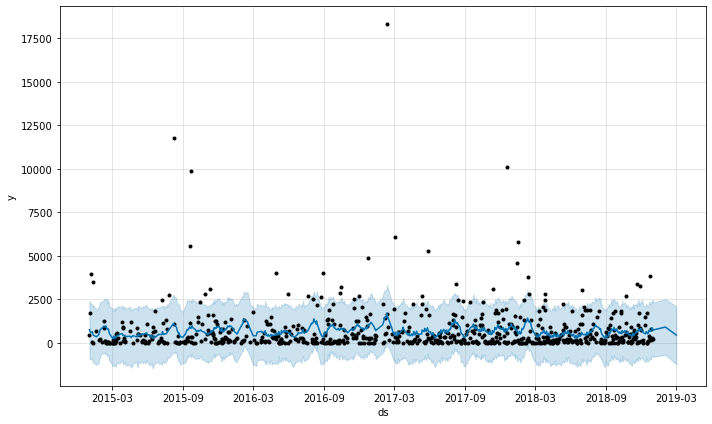

In [46]:
#plot the model for central region
fig1 = central_model.plot(central_forecast)


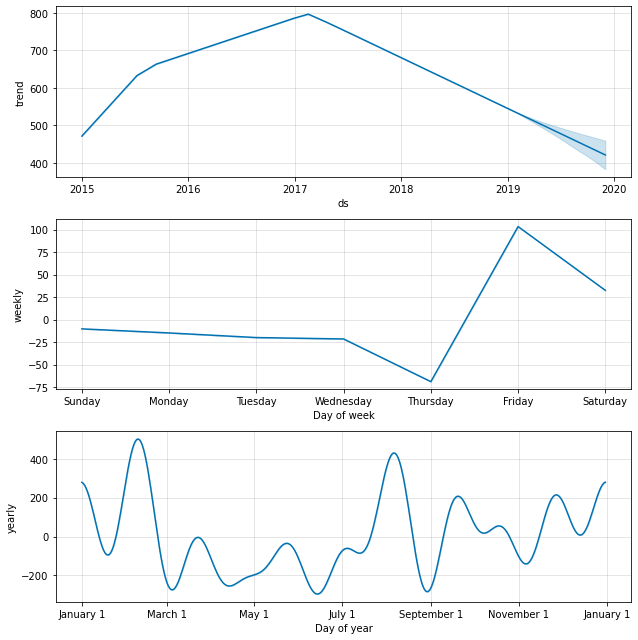

In [43]:

fig2 = central_model.plot_components(central_forecast)
